# Eager Few Shot Object Detection Colab

Welcome to the Eager Few Shot Object Detection Colab --- in this colab we demonstrate fine tuning of a (TF2 friendly) RetinaNet architecture on very few examples of a novel class after initializing from a pre-trained COCO checkpoint.
Training runs in eager mode.

Estimated time to run through this colab (with GPU): < 5 minutes.

## Imports

In [ ]:
!pip install -U --pre tensorflow=="2.2.0"

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.2.0


In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3985, done.
remote: Counting objects: 100% (3985/3985), done.
remote: Compressing objects: 100% (3094/3094), done.
remote: Total 3985 (delta 1151), reused 1942 (delta 834), pack-reused 0
Receiving objects: 100% (3985/3985), 49.76 MiB | 27.42 MiB/s, done.
Resolving deltas: 100% (1151/1151), done.


In [ ]:
pip install PyYAML=="5.1"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install pillow=="9.5"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


import os
import random
import io
import imageio
import glob
import pandas as pd
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import matplotlib
import matplotlib.pyplot as plt

import cv2
import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage
import PIL.ImageOps
import tensorflow as tf

import os
import numpy as np
import pandas as pd
from os import path
import matplotlib.patches as patches
import matplotlib.pylab as plt
from PIL import Image


from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

# Utilities

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def load_image_into_numpy_array(path,color=1):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata().convert('RGB')).reshape(
      (im_height, im_width,3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None,
                    min_score_thresh=0.8):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=min_score_thresh)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizar las imagenes de carga

In [ ]:
import os
import numpy as np
BASE_FOLDER="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/train/"
Lista_imagenes = os.listdir(BASE_FOLDER+'images/')
Lista_imagenes.sort()
print(len(Lista_imagenes))

1616


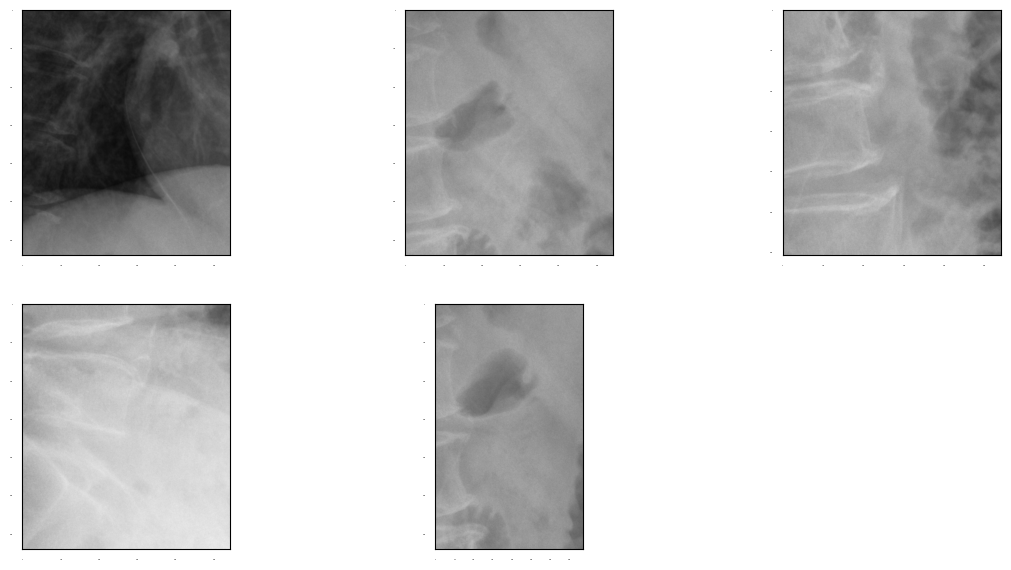

In [ ]:
# Load images and visualize
train_image_dir = "/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/train/images"
train_images_np = []

for i in range(0, 5):
  image_path = os.path.join(train_image_dir,Lista_imagenes[i] )
  train_images_np.append(load_image_into_numpy_array(image_path))

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

for idx, train_image_or in enumerate(train_images_np):
  plt.subplot(2, 3, idx+1)
  plt.imshow(train_image_or)
plt.show()




# Cargar datos para entrenamiento.

In [ ]:
def Cargar_imagen(Name,Path):
  img=cv2.imread(os.path.join(Path, Name+".jpg"))
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return(img)

In [ ]:
# Graficar(img,pd.DataFrame(Data,columns=["Xmin","Ymin","Xmax","Ymax"]))
def Graficar(img,df):

  # Imagen Principal
  plt.clf()
  fig, ax = plt.subplots()
  final_image = Image.fromarray(img)
  # Impresión con escala para mejor visualizacion
  fig.set_size_inches(10, 10, forward=True)
  ax.imshow(final_image, cmap='gray', vmin=0, vmax=255)
  #
  #dibujar puntos de enfermedad
  img_height,img_width=np.array(img).shape[0],np.array(img).shape[1]
  # print(img_height,img_height)
  for i in df.index:
      # Create a Rectangle patch
      xmin= int((float(df["Xmin"][i])*img_width))
      ymin= int((float(df["Ymin"][i])*img_height))
      xmax= int((float(df["Xmax"][i])*img_width))
      ymax= int((float(df["Ymax"][i])*img_height))
      Width = xmax-xmin
      Height= ymax-ymin
      print(xmin,ymin,Width,Height)
#     Ver Imagen con Restricciones
      rect = patches.Rectangle((xmin,ymin), int(Width), int(Height), linewidth=2, edgecolor='r', facecolor='none')
      plt.text(xmin, ymin,str(i))
      ax.add_patch(rect)
  plt.show()

In [ ]:
def Generador_data(Name,path):
  DF=[]
  with open(path+Name+".txt", 'r') as txt_file:
    df=txt_file.read()
  # print(df)
  df2=df.split("\n")
  # print(df2)
  for i in range(len(df2)):
    df3 = df2[i].split(" ")
    if (df3!=[]):
      DF.append(df3)
  DF.pop(-1)
  # print(DF)
  # print(len(DF))
  Data=pd.DataFrame(DF,columns=["Class","Xcenter","Ycenter","Width","Height"])
  # print(np.array(list(Data.values)))
  Data = Data.drop(["Class"], axis=1)
  return(np.array(list(Data.values), dtype='f'))


In [ ]:
# #Cargar Imagenes
# train_images_np=[]
# gt_boxes = []
# Path="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/train/"
# cont=1
# for Name in Lista_imagenes:

#   print(str(cont)+str(" ")+str(Name))
#   Name =  Name.split(".")
#   img = Cargar_imagen(Name[0],Path+"images")

#   # print(img.shape)
#   train_images_np.append(load_image_into_numpy_array(image_path))
#   Data=Generador_data(Name[0],Path+"labels/")
#   print(Data)

#   print((pd.DataFrame(Data)).index)
#   img_height,img_width=np.array(img).shape[0],np.array(img).shape[1]
#   df=[]
#   for i in (pd.DataFrame(Data)).index:
#           Width = int(float(Data[i][2])*img_width)
#           Height= int(float(Data[i][3])*img_height)
#           xmin= int((float(Data[i][0])*img_width)- Width/2)
#           ymin= int((float(Data[i][1])*img_height) - Height/2)
#           xmax= int((float(Data[i][0])*img_width)+ Width/2)
#           ymax= int((float(Data[i][1])*img_height) + Height/2)
#           print(img_height,img_width,Width,Height,xmin,ymin,xmax,ymax)
#           df.append([ymin/img_height,xmin/img_width,ymax/img_height,xmax/img_width])
#   print(df)
#   gt_boxes.append(np.array(df, dtype='f'))
#   Graficar(img,pd.DataFrame(df,columns=["Ymin","Xmin","Ymax","Xmax"]))
#   plt.subplot(2, 3, idx+1)
#   # Graficar(img,pd.DataFrame(Data,columns=["Xcenter","Ycenter","Width","Height"]))
#   if cont==1616:
#     break
#   cont=cont+1

In [ ]:
import os
import numpy as np
BASE_FOLDER="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/train/"
Lista_imagenes = os.listdir(BASE_FOLDER+'images/')
Lista_imagenes.sort()
print(len(Lista_imagenes))

1616


In [ ]:
#Cargar Imagenes
train_images_np=[]
gt_boxes = []
Path="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/train/"
cont=1

for i in range(1000,1200):
# for i in range(550,1100):
# for i in range(1100,len(Lista_imagenes)):
  Name = Lista_imagenes[i]
  print(i)
  Name =  Name.split(".")
  image_path = os.path.join(Path+"images/",Lista_imagenes[i] )
  img = load_image_into_numpy_array(image_path)

  # print(img.shape)
  train_images_np.append(load_image_into_numpy_array(image_path))
  Data=Generador_data(Name[0],Path+"labels/")
  # print(Data)

  # print((pd.DataFrame(Data)).index)
  img_height,img_width=np.array(img).shape[0],np.array(img).shape[1]
  df=[]
  for i in (pd.DataFrame(Data)).index:
          Width = int(float(Data[i][2])*img_width)
          Height= int(float(Data[i][3])*img_height)
          xmin= int((float(Data[i][0])*img_width)- Width/2)
          ymin= int((float(Data[i][1])*img_height) - Height/2)
          xmax= int((float(Data[i][0])*img_width)+ Width/2)
          ymax= int((float(Data[i][1])*img_height) + Height/2)
          # print(img_height,img_width,Width,Height,xmin,ymin,xmax,ymax)
          df.append([ymin/img_height,xmin/img_width,ymax/img_height,xmax/img_width])
  # print(df)
  gt_boxes.append(np.array(df, dtype=np.float32))




  # Graficar(img,pd.DataFrame(df,columns=["Ymin","Xmin","Ymax","Xmax"]))
  # plt.subplot( 2, 3, idx+1)
  # # Graficar(img,pd.DataFrame(Data,columns=["Xcenter","Ycenter","Width","Height"]))
  # if cont==1616:
  #   break
  # cont=cont+1


In [ ]:
gt_boxes[0]

array([[0.5744681 , 0.125     , 0.65302783, 0.2515625 ],
       [0.85106385, 0.153125  , 0.9247136 , 0.2234375 ],
       [0.40261865, 0.0953125 , 0.5090016 , 0.221875  ],
       [0.14893617, 0.1234375 , 0.24222586, 0.2140625 ],
       [0.00818331, 0.1375    , 0.12111293, 0.2171875 ]], dtype=float32)

In [ ]:
#Preparacion de datos


# By convention, our non-background classes start counting at 1.  Given
# that we will be predicting just one class, we will therefore assign it a
# `class id` of 1.
Osteophytes_id = 1
num_classes = 1

num_classes = 1

category_index = {Osteophytes_id: {'id': Osteophytes_id, 'name': 'Osteophytes'}}

# Convert class labels to one-hot; convert everything to tensors.
# The `label_id_offset` here shifts all classes by a certain number of indices;
# we do this here so that the model receives one-hot labels where non-background
# classes start counting at the zeroth index.  This is ordinarily just handled
# automatically in our training binaries, but we need to reproduce it here.
label_id_offset = 1
train_image_tensors = []
gt_classes_one_hot_tensors = []
gt_box_tensors = []
for (train_image_or, gt_box_np) in zip(train_images_np, gt_boxes):
  train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(train_image_or, dtype=tf.float32), axis=0))
  gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))

  zero_indexed_groundtruth_classes = tf.convert_to_tensor(np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) - label_id_offset)
  gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_groundtruth_classes, num_classes))

print('Done prepping data.')

Done prepping data.


# Visualizar los datso ingresados correctamente

In [ ]:
# # Comprobar si los daatos de ingreso son correctos
# plt.figure(figsize=(30, 15))
# # for idx, train_image_or in enumerate(train_images_np):
# for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
#   aux=gt_box_np.shape[0]
#   dummy_scores = [1]*aux
#   plot_detections(
#       train_image_np,
#       gt_box_np,
#       np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32),
#       dummy_scores, category_index,
#       figsize=(12, 16),
#       image_name=None)
#   plt.show()

# Creacion model

In [ ]:
# Download the checkpoint and put it into models/research/object_detection/test_data/

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2023-09-20 23:53:44--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   271MB/s    in 0.9s    

2023-09-20 23:53:45 (271 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [ ]:
tf.keras.backend.clear_session()

print('Building model and restoring weights for fine-tuning...', flush=True)
num_classes = 1
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
# checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'
# checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/ckpTFMC250-1'
# checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/BEST-1'
checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/Los best/7BEST-1'
# Load pipeline config and build a detection model.
#
# Since we are working off of a COCO architecture which predicts 90
# class slots by default, we override the `num_classes` field here to be just
# one (for our new rubber ducky class).
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

# Set up object-based checkpoint restore --- RetinaNet has two prediction
# `heads` --- one for classification, the other for box regression.  We will
# restore the box regression head but initialize the classification head
# from scratch (we show the omission below by commenting out the line that
# we would add if we wanted to restore both heads)
fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    #    (i.e., the classification head that we *will not* restore)
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
fake_model = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=fake_box_predictor)
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(checkpoint_path)               #Modificado

# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)
print('Weights restored!')

Building model and restoring weights for fine-tuning...
Weights restored!


# **Entrenamiento**



In [ ]:
tf.keras.backend.set_learning_phase(True)

# These parameters can be tuned; since our training set has 5 images
# it doesn't make sense to have a much larger batch size, though we could
# fit more examples in memory if we wanted to.
batch_size = 20
learning_rate = 0.001
num_batches = 1000
BEST=99
# Select variables in top layers to fine-tune.
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']
for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

# Set up forward + backward pass for a single train step.
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):
  """Get a tf.function for training step."""

  # Use tf.function for a bit of speed.
  # Comment out the tf.function decorator if you want the inside of the
  # function to run eagerly.
  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    """A single training iteration.

    Args:
      image_tensors: A list of [1, height, width, 3] Tensor of type tf.float32.
        Note that the height and width can vary across images, as they are
        reshaped within this function to be 640x640.
      groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
        tf.float32 representing groundtruth boxes for each image in the batch.
      groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
        with type tf.float32 representing groundtruth boxes for each image in
        the batch.

    Returns:
      A scalar tensor representing the total loss for the input batch.
    """
    shapes = tf.constant(batch_size * [[640, 640, 3]], dtype=tf.int32)
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list)
    with tf.GradientTape() as tape:
      preprocessed_images = tf.concat(
          [detection_model.preprocess(image_tensor)[0]
           for image_tensor in image_tensors], axis=0)
      prediction_dict = model.predict(preprocessed_images, shapes)
      losses_dict = model.loss(prediction_dict, shapes)
      total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']
      gradients = tape.gradient(total_loss, vars_to_fine_tune)
      optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
    return total_loss

  return train_step_fn

optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate)
train_step_fn = get_model_train_step_function(
    detection_model, optimizer, to_fine_tune)

print('Start fine-tuning!', flush=True)
for idx in range(num_batches):
  # Grab keys for a random subset of examples
  all_keys = list(range(len(train_images_np)))
  random.shuffle(all_keys)
  example_keys = all_keys[:batch_size]

  # Note that we do not do data augmentation in this demo.  If you want a
  # a fun exercise, we recommend experimenting with random horizontal flipping
  # and random cropping :)
  gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
  gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
  image_tensors = [train_image_tensors[key] for key in example_keys]

  # Training step (forward pass + backwards pass)
  total_loss = train_step_fn(image_tensors, gt_boxes_list, gt_classes_list)
  print('batch ' + str(idx) + ' of ' + str(num_batches)
    + ', loss=' +  str(total_loss.numpy()), flush=True)

  if BEST>total_loss:
    ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
    checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/BEST'
    ckpt.save(checkpoint_path)
    BEST=total_loss
    print('Guardado = '+str(total_loss.numpy()))
  if idx % 25 == 0:
    print('batch ' + str(idx) + ' of ' + str(num_batches)
    + ', loss=' +  str(total_loss.numpy()), flush=True)

    print('Guardado '+str(idx)+str("ckpTFMC2")+str(idx))
    ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
    checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/ckpTFMC5'+str(idx)
    ckpt.save(checkpoint_path)
print('Done fine-tuning!')


Start fine-tuning!
batch 0 of 1000, loss=1.0983009
Guardado = 1.0983009
batch 0 of 1000, loss=1.0983009
Guardado 0ckpTFMC20
batch 1 of 1000, loss=1.1873424
batch 2 of 1000, loss=1.0520761
Guardado = 1.0520761
batch 3 of 1000, loss=1.1337736
batch 4 of 1000, loss=1.1217108
batch 5 of 1000, loss=1.1066511
batch 6 of 1000, loss=1.0908049
batch 7 of 1000, loss=1.117484
batch 8 of 1000, loss=1.0254388
Guardado = 1.0254388
batch 9 of 1000, loss=1.138157
batch 10 of 1000, loss=1.023911
Guardado = 1.023911
batch 11 of 1000, loss=1.0777283
batch 12 of 1000, loss=0.99930894
Guardado = 0.99930894
batch 13 of 1000, loss=0.9497379
Guardado = 0.9497379
batch 14 of 1000, loss=0.98246425
batch 15 of 1000, loss=1.0443274
batch 16 of 1000, loss=0.96708906
batch 17 of 1000, loss=0.96747816
batch 18 of 1000, loss=1.0050377
batch 19 of 1000, loss=1.0005257
batch 20 of 1000, loss=0.9809407
batch 21 of 1000, loss=0.9960426
batch 22 of 1000, loss=0.9801682
batch 23 of 1000, loss=0.95764375
batch 24 of 1000, l

KeyboardInterrupt: ignored

# `CArgar checkpoint

In [ ]:
tf.keras.backend.clear_session()

print('Building model and restoring weights for fine-tuning...', flush=True)
num_classes = 1
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
# checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'
checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/BEST-1'
# checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/6BEST-1'
# checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/ckpTFM9300-1'
# checkpoint_path = '/content/drive/MyDrive/Trabajo_final_VIU/resten/ckpTFM950-1'

# Load pipeline config and build a detection model.
#
# Since we are working off of a COCO architecture which predicts 90
# class slots by default, we override the `num_classes` field here to be just
# one (for our new rubber ducky class).
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Set up object-based checkpoint restore --- RetinaNet has two prediction
# `heads` --- one for classification, the other for box regression.  We will
# restore the box regression head but initialize the classification head
# from scratch (we show the omission below by commenting out the line that
# we would add if we wanted to restore both heads)
fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    #    (i.e., the classification head that we *will not* restore)
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
fake_model = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=fake_box_predictor)
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(checkpoint_path)

# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)
print('Weights restored!')

Building model and restoring weights for fine-tuning...
Weights restored!


# TEST


In [ ]:
def Cargar_imagen(Name,Path):
  img=cv2.imread(os.path.join(Path, Name+".jpg"))
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return(img)

In [ ]:
# Graficar(img,pd.DataFrame(Data,columns=["Xmin","Ymin","Xmax","Ymax"]))
def Graficar(img,df):

  # Imagen Principal
  plt.clf()
  fig, ax = plt.subplots()
  final_image = Image.fromarray((img * 255).astype(np.uint8))
  # Impresión con escala para mejor visualizacion
  fig.set_size_inches(10, 10, forward=True)
  ax.imshow(final_image, cmap='gray', vmin=0, vmax=255)
  #
  #dibujar puntos de enfermedad
  img_height,img_width=np.array(img).shape[0],np.array(img).shape[1]
  # print(img_height,img_height)
  for i in df.index:
      # Create a Rectangle patch
      xmin= int((float(df["Xmin"][i])*img_width))
      ymin= int((float(df["Ymin"][i])*img_height))
      xmax= int((float(df["Xmax"][i])*img_width))
      ymax= int((float(df["Ymax"][i])*img_height))
      Width = xmax-xmin
      Height= ymax-ymin
      print(xmin,ymin,Width,Height)
#     Ver Imagen con Restricciones
      rect = patches.Rectangle((xmin,ymin), int(Width), int(Height), linewidth=2, edgecolor='r', facecolor='none')
      plt.text(xmin, ymin,str(i))
      ax.add_patch(rect)
  plt.show()

In [ ]:
#Generacion y cargado de los boxes

def Generador_data(Name,path):
  DF=[]
  with open(path+Name+".txt", 'r') as txt_file:
    df=txt_file.read()
  # print(df)
  df2=df.split("\n")
  # print(df2)
  for i in range(len(df2)):
    df3 = df2[i].split(" ")
    if (df3!=[]):
      DF.append(df3)
  DF.pop(-1)
  # print(DF)
  # print(len(DF))
  Data=pd.DataFrame(DF,columns=["Class","Xcenter","Ycenter","Width","Height"])
  # print(np.array(list(Data.values)))
  Data = Data.drop(["Class"], axis=1)
  return(np.array(list(Data.values), dtype='f'))

In [ ]:
import os
import numpy as np
BASE_FOLDER="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test/"
Test = os.listdir(BASE_FOLDER+'images/')
Test.sort()
print(len(Test))

1664


In [ ]:
#Cargar Imagenes
test_images_or=[]
test_gt_boxes = []
Path="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test/"
cont=0
for i in range(0,len(Test)):
  Name=Test[i]
  # print(Name)

  Name =  Name.split(".")
  img = Cargar_imagen(Name[0],Path+"images")
  test_images_or.append((np.array(img)).astype(np.float32))

  img2=(np.array(img/255)).astype(np.float32)
  # print((np.array(img/255)).shape)
  # print(img2)
  Data=Generador_data(Name[0],Path+"labels/")
  # print(Data)
  img_height,img_width=np.array(img).shape[0],np.array(img).shape[1]
  df=[]
  for i in (pd.DataFrame(Data)).index:
          Width = int(float(Data[i][2])*img_width)
          Height= int(float(Data[i][3])*img_height)
          xmin= int((float(Data[i][0])*img_width)- Width/2)
          ymin= int((float(Data[i][1])*img_height) - Height/2)
          xmax= int((float(Data[i][0])*img_width)+ Width/2)
          ymax= int((float(Data[i][1])*img_height) + Height/2)
          # print(img_height,img_width,Width,Height,xmin,ymin,xmax,ymax)
          df.append([xmin/img_width,ymin/img_height,xmax/img_width,ymax/img_height])
  # print(cont)
  test_gt_boxes.append(np.array(df, dtype='f'))
  # Graficar(img2,pd.DataFrame(df,columns=["Xmin","Ymin","Xmax","Ymax"]))
  # Graficar(img,pd.DataFrame(Data,columns=["Xcenter","Ycenter","Width","Height"]))
  if cont==30: #1==cont/5:
     break
  cont=cont+1

In [ ]:
test_image_tensors=[]
test_gt_box_tensors=[]
for (test_images, test_gt) in zip(test_images_or, test_gt_boxes):
  test_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(test_images, dtype=tf.float32), axis=0))
  test_gt_box_tensors.append(tf.convert_to_tensor(test_gt, dtype=tf.float32))

  # zero_indexed_groundtruth_classes = tf.convert_to_tensor(np.ones(shape=[test_gt_boxes.shape[0]], dtype=np.int32) - label_id_offset)
  # gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_groundtruth_classes, num_classes))

In [ ]:
# Graficar(img,pd.DataFrame(Data,columns=["Xmin","Ymin","Xmax","Ymax"]))
def Graficar2(img,df,score,category_index):

  # Imagen Principal
  plt.clf()
  fig, ax = plt.subplots()
  final_image = Image.fromarray((img).astype(np.uint8))
  # Impresión con escala para mejor visualizacion
  fig.set_size_inches(10, 10, forward=True)
  ax.imshow(final_image, cmap='gray', vmin=0, vmax=255)
  #
  #dibujar puntos de enfermedad
  img_height,img_width=np.array(img).shape[0],np.array(img).shape[1]
  # print(img_height,img_height)
  for i in df.index:
     if(score[i]>=category_index):
      # Create a Rectangle patch
      xmin= int((float(df["Xmin"][i])*img_width))
      ymin= int((float(df["Ymin"][i])*img_height))
      xmax= int((float(df["Xmax"][i])*img_width))
      ymax= int((float(df["Ymax"][i])*img_height))
      Width = xmax-xmin
      Height= ymax-ymin
      print(xmin,ymin,Width,Height)
#     Ver Imagen con Restricciones
      rect = patches.Rectangle((xmin,ymin), int(Width), int(Height), linewidth=2, edgecolor='r', facecolor='none')
      plt.text(xmin, ymin,str(i)+("-")+str(round(score[i],2)),bbox=dict(facecolor='red', alpha=0.5),color="g")
      ax.add_patch(rect)
  plt.show()

In [ ]:
Test final para pametrizacion

SyntaxError: ignored

In [ ]:
Osteophytes_id = 1
num_classes = 1

num_classes = 1

category_index = {Osteophytes_id: {'id': Osteophytes_id, 'name': 'Osteophytes'}}

In [ ]:
# from PIL import Image
# Osteophytes_id = 1
# num_classes = 1

# num_classes = 1

# category_index = {Osteophytes_id: {'id': Osteophytes_id, 'name': 'Osteophytes'}}

# test_image_dir = "/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test/"
# # for i in range(len(Test)):
# #   image_path = os.path.join(test_image_dir, 'out' + str(i) + '.jpg')
# #   test_images_np.append(np.expand_dims(
# #       load_image_into_numpy_array(image_path), axis=0))

# # Again, uncomment this decorator if you want to run inference eagerly
# @tf.function
# def detect(input_tensor):
#   """Run detection on an input image.

#   Args:
#     input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
#       Note that height and width can be anything since the image will be
#       immediately resized according to the needs of the model within this
#       function.

#   Returns:
#     A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
#       and `detection_scores`).
#   """
#   preprocessed_image, shapes = detection_model.preprocess(input_tensor)
#   prediction_dict = detection_model.predict(preprocessed_image, shapes)
#   return detection_model.postprocess(prediction_dict, shapes)

# # Note that the first frame will trigger tracing of the tf.function, which will
# # take some time, after which inference should be fast.

# label_id_offset = 1
# for i in range(0,len(test_images_or)):
#   detections = detect(test_image_tensors[i])
#   Graficar2(test_images_or[i],pd.DataFrame(detections['detection_boxes'][0],columns=["Ymin","Xmin","Ymax","Xmax"]),detections['detection_scores'][0].numpy(),0.40)
#   plt.show()

In [ ]:
import os
import numpy as np
BASE_FOLDER="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test/"
Lista_imagenes = os.listdir(BASE_FOLDER+'images/')
Lista_imagenes.sort()
print(len(Lista_imagenes))

1664


In [ ]:
import numpy as np

def non_max_suppression(boxes, scores, threshold):

    if len(boxes) == 0:
        return []

    # Convert boxes to NumPy array
    boxes = np.array(boxes)

    # Sort boxes by their scores in descending order
    scores = np.array(scores)
    sorted_indices = np.argsort(scores)[::-1]

    selected_indices = []

    while len(sorted_indices) > 0:
        # Get the index of the highest scoring box
        highest_score_index = sorted_indices[0]
        selected_indices.append(highest_score_index)

        # Calculate IoU between the highest scoring box and all other boxes
        ious = calculate_iou(boxes[highest_score_index], boxes[sorted_indices[1:]])

        # Find the indices of boxes with IoU less than the threshold
        below_threshold_indices = np.where(ious < threshold)[0]

        # Remove those indices from the list of sorted_indices
        sorted_indices = sorted_indices[below_threshold_indices + 1]

    return selected_indices

def calculate_iou(box, boxes):

    x1 = np.maximum(box[0], boxes[:, 0])
    y1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[2], boxes[:, 2])
    y2 = np.minimum(box[3], boxes[:, 3])

    intersection_area = np.maximum(0, x2 - x1 + 1) * np.maximum(0, y2 - y1 + 1)

    box_area = (box[2] - box[0] + 1) * (box[3] - box[1] + 1)
    boxes_area = (boxes[:, 2] - boxes[:, 0] + 1) * (boxes[:, 3] - boxes[:, 1] + 1)

    iou = intersection_area / (box_area + boxes_area - intersection_area)

    return iou




In [ ]:

test_image_dir="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test/images"
test_images_np = []
for i in range(0, len(Lista_imagenes)):
  image_path = os.path.join(test_image_dir,Lista_imagenes[i])
  test_images_np.append(np.expand_dims(load_image_into_numpy_array(image_path), axis=0))
# display(Lista_imagenes[0:10])
# Again, uncomment this decorator if you want to run inference eagerly
@tf.function
def detect(input_tensor):

  preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  prediction_dict = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(prediction_dict, shapes,)

# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
for i in range(len(test_images_np)):
  input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
  detections = detect(input_tensor)
  # print(i)

  selected_indices = non_max_suppression(detections['detection_boxes'][0].numpy(), detections['detection_scores'][0].numpy(), threshold = 0.75)
  # print("Selected Indices after NMS:", selected_indices)

  # plot_detections(
  #     test_images_np[i][0],
  #     detections['detection_boxes'][0].numpy()[selected_indices],
  #     detections['detection_classes'][0].numpy().astype(np.uint32)[selected_indices]
  #     + label_id_offset,
  #     detections['detection_scores'][0].numpy()[selected_indices],
  #     category_index, figsize=(30, 40), image_name=None,min_score_thresh=0.40)
  #     #Generar archivo TXT para comparar resultados
  #     #Impresión en TXT
  #     #Impresión en TXT
  # plt.show()


  Aux=""
  for j in range(0,len(selected_indices)):
      score=detections['detection_scores'][0].numpy()[selected_indices][j]
      if (score>=0.40):
        clase=detections['detection_classes'][0].numpy().astype(np.uint32)[j]
        box= detections['detection_boxes'][0].numpy()[selected_indices][j]
        Aux=Aux+str(str(clase)+" "+str(box[0])+" "+str(box[1])+" "+str(box[2])+" "+str(box[3])+" "+str(score)+ "\n")

  path="/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test/"+"/predResNet50/"
  isExist = os.path.exists(path)
  if not isExist:
    os.makedirs(path)

  nombre=Lista_imagenes[i].split(".")
  # print(nombre)
  with open(path+str(nombre[0])+".txt", 'w') as txt_file:
    txt_file.write(str(Aux))
    print(path+str(nombre[0])+".txt")


/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen0-4.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen1-3.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen10-4.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen100-4.txt


/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen100-6.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen101-11.txt


/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen101-4.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen101-5.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen101-7.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen101-8.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen102-4.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen102-6.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen102-8.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen103-4.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen103-5.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen103-7.txt
/content/drive/MyDrive/Trabajo_final_VIU/YOLOV8/Dataset/test//predResNet50/imagen103-8.txt